# A Julia Set Visualization
We define the the function $f_c:\mathbb{C}\rightarrow\mathbb{C}$ where $f_c(z) = z^2+c$ for fixed $c \in \mathbb{C}$. We then define the sequence $(z_n)_{n=1}^\infty\subseteq\mathbb{C}$ for $z_0 \in \mathbb{C}$, and $z_{n+1} = f_c(z_n)$

A Julia set for a chosen c value is the set of all $z0 \in \mathbb{C}$ for which $z_n \nrightarrow \infty$

In this code, we create a matrix representation of the complex plane, and iterate on each inital value using the above sequence definition to find the values of z0 that belong to the Julia Set for c = -0.8 + 0.156i. We finish our work by visualizing the set. 

In [19]:
#Import necessary packages
import numpy as np
import matplotlib.pyplot as plt

In [20]:
#Define sequence rule for iterated map
def f(z,c):
    return z**2 + c

In [21]:
#Create real and imaginary axis boundaries x and y
xmin = -2
xmax = 2
ymin = -1
ymax = 1
#Deine number of partitions of x, set partitions of y to maintain a proper aspect ratio
n = 1000
m = int(3/5*n)
delta1 = (xmax-xmin)/n
delta2 = (ymax-ymin)/m

In [22]:
#Create a properly sized zero matrix
Z0 = np.zeros((m+1,n+1), dtype = np.complex_)
#Create matrix filled with our chosen value of c        
c = complex(-0.8,0.156)
Z = Z0 + c

#Populate our matrix of inial z0 values
x = np.arange(xmin,xmax+delta1,delta1)
y = np.arange(ymax,ymin-delta2,-delta2)

for a, num1 in enumerate(x):
    for b, num2 in enumerate(y):
        Z0[b][a] =  complex(num1,num2)
        


In [23]:
#Numbers get very large as they diverge. Ignore warnings that would come up
import warnings
warnings.filterwarnings('ignore')
Z1 = np.zeros((m+1,n+1))
#It can be shown that values of c for which |zn| surpasses 2 will eventually diverge
M = 2
#Iterate 100 times
for i in range(100):
    Z0 = f(Z0,Z)
    #Create matrix for our colormap. This will keep track of how quickly certain values surpass 2 in modulus.
    Z1 += np.where(abs(Z0)>M,1,0)

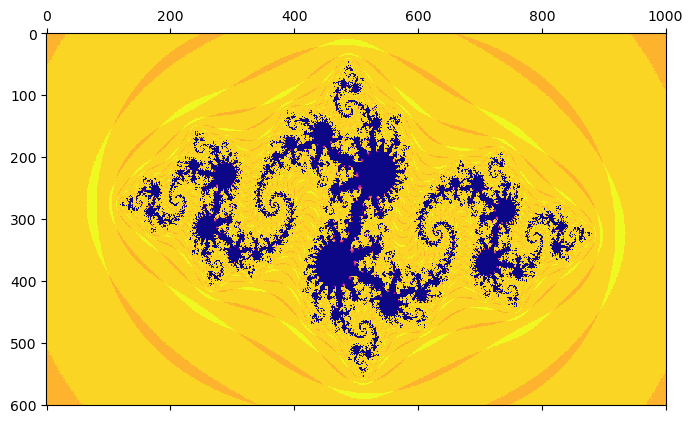

In [24]:
#Visualize matrix
plt.matshow(Z1,cmap = 'plasma')

## Oh the beauty of mathematics